In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.summarization.bm25 import get_bm25_weights
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
import sklearn
import math
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min,jaccard_similarity_score
from sklearn.metrics.pairwise import cosine_similarity as cosu, euclidean_distances
from pylab import savefig
from tqdm import tqdm

In [2]:
f=open("a.txt", "r")

In [3]:
filename=f.name
file_name=filename.split('.')

In [4]:
data=(f.read())
print(data)

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.
Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods. Tree based methods empower predictive models with high accuracy, stability and ease of interpretation. Unlike linear models, they map non-linear relationships quite well. They are adaptable at solving any kind of problem at hand (classification or

In [5]:
data=[data]

In [6]:
sentences=[]
for s in data:
    sentences.append(sent_tokenize(s))
sentences = [[y] for x in sentences for y in x] # flatten list

In [7]:
sentences

[['A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.'],
 ['It is one way to display an algorithm that only contains conditional control statements.'],
 ['A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute (e.g.'],
 ['whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).'],
 ['The paths from root to leaf represent classification rules.'],
 ['Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods.'],
 ['Tree based methods empower predictive models with high accuracy, stability and ease of interpretation.'],
 ['Unlike linear models, they map non-linear relationships quite well.'],
 ['They are adaptable at sol

In [8]:
(len(sentences))

116

In [9]:
sentences[0]

['A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.']

In [10]:
word_sentence=[]
for i in sentences:
    for j in i:
        word_sentence.append(word_tokenize(j))
word_sentence

[['A',
  'decision',
  'tree',
  'is',
  'a',
  'decision',
  'support',
  'tool',
  'that',
  'uses',
  'a',
  'tree-like',
  'graph',
  'or',
  'model',
  'of',
  'decisions',
  'and',
  'their',
  'possible',
  'consequences',
  ',',
  'including',
  'chance',
  'event',
  'outcomes',
  ',',
  'resource',
  'costs',
  ',',
  'and',
  'utility',
  '.'],
 ['It',
  'is',
  'one',
  'way',
  'to',
  'display',
  'an',
  'algorithm',
  'that',
  'only',
  'contains',
  'conditional',
  'control',
  'statements',
  '.'],
 ['A',
  'decision',
  'tree',
  'is',
  'a',
  'flowchart-like',
  'structure',
  'in',
  'which',
  'each',
  'internal',
  'node',
  'represents',
  'a',
  '“',
  'test',
  '”',
  'on',
  'an',
  'attribute',
  '(',
  'e.g',
  '.'],
 ['whether',
  'a',
  'coin',
  'flip',
  'comes',
  'up',
  'heads',
  'or',
  'tails',
  ')',
  ',',
  'each',
  'branch',
  'represents',
  'the',
  'outcome',
  'of',
  'the',
  'test',
  ',',
  'and',
  'each',
  'leaf',
  'node',
  'r

In [11]:
#removal of stop words
stop_words = set(stopwords.words('english')) 
line=[]
filtered_sentence=[]

for i in word_sentence:
    for j in i:
        if not j in stop_words:
            line.append(j)
    filtered_sentence.append(line)
    line=[]



In [12]:
filtered_sentence[0]

['A',
 'decision',
 'tree',
 'decision',
 'support',
 'tool',
 'uses',
 'tree-like',
 'graph',
 'model',
 'decisions',
 'possible',
 'consequences',
 ',',
 'including',
 'chance',
 'event',
 'outcomes',
 ',',
 'resource',
 'costs',
 ',',
 'utility',
 '.']

In [13]:
#stemming the words
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
stemmed_sentences=[]
line=[]
for i in filtered_sentence:
    for j in i:
       line.append(ps.stem(j))
    stemmed_sentences.append(line)
    line=[]

In [14]:
# remove punctuations, numbers and special characters
alphabetic_sentences=[]
line=[]
for i in stemmed_sentences:
    line.append(pd.Series(i).str.replace("[^a-zA-Z]", " "))
    
    
    alphabetic_sentences.append(line)
    line=[]

In [15]:
line = []

for i in alphabetic_sentences:
   
    for j in i:
        l=[]
        for x in j.values:
            if not x ==' ':
                l.append(x.lower())
        line.append(l)
line

[['a',
  'decis',
  'tree',
  'decis',
  'support',
  'tool',
  'use',
  'tree lik',
  'graph',
  'model',
  'decis',
  'possibl',
  'consequ',
  'includ',
  'chanc',
  'event',
  'outcom',
  'resourc',
  'cost',
  'util'],
 ['it',
  'one',
  'way',
  'display',
  'algorithm',
  'contain',
  'condit',
  'control',
  'statement'],
 ['a',
  'decis',
  'tree',
  'flowchart lik',
  'structur',
  'intern',
  'node',
  'repres',
  'test',
  'attribut',
  'e g'],
 ['whether',
  'coin',
  'flip',
  'come',
  'head',
  'tail',
  'branch',
  'repres',
  'outcom',
  'test',
  'leaf',
  'node',
  'repres',
  'class',
  'label',
  'decis',
  'taken',
  'comput',
  'attribut'],
 ['the', 'path', 'root', 'leaf', 'repres', 'classif', 'rule'],
 ['tree',
  'base',
  'learn',
  'algorithm',
  'consid',
  'one',
  'best',
  'mostli',
  'use',
  'supervis',
  'learn',
  'method'],
 ['tree',
  'base',
  'method',
  'empow',
  'predict',
  'model',
  'high',
  'accuraci',
  'stabil',
  'eas',
  'interpret'],


In [16]:
words=[]
words=[y for x in line for y in x ]

#Taking all distinct words in an array
Distinct_Words=[y for y in set(words)]

In [17]:
len(Distinct_Words)

460

In [18]:

len(words)

1239

# Data Visulaizaton

In [19]:
for i in range(len(Distinct_Words)):
    print (i,Distinct_Words[i])
    

0 intern
1 class
2 power
3 mitig
4 fulli
5 train
6 engin
7 decision 
8 label
9 mani
10 look
11 energi
12 littl
13 empow
14 opposit
15 valu
16 pain
17 similar
18 student
19 wirth
20 civil
21 represent
22 multipl
23 attribut
24 final
25 mine
26 priorit
27 balanc
28 model
29 problem
30 identifi
31 avail
32 construct
33 term
34 leaf
35 els
36 get
37 assumpt
38 creat
39 help
40 read
41 type
42 user
43 recurs
44 condit
45 unlik
46 kind
47 path
48 time
49 tree lik
50 suit
51 but
52 well
53 room
54 period
55 singl
56 control
57 anim
58 inform
59 independ
60 classif
61 exampl
62 strategi
63 effort
64 continu
65 natur
66     
67 blood
68 sub popul
69 in
70 relat
71 work
72 applic
73 differ
74 stabil
75 histor
76 variat
77 commonli
78 root
79 whole
80 includ
81 per
82 process
83 pre defin
84 display
85 lead
86 when
87 decision tre
88 default
89 play
90 event
91 deliber
92 top down
93 structur
94 defin
95 greedi
96 graphic
97 broad
98 borrow
99 detail
100 popular
101 sale
102 categor
103 statist
1

## Count representation


In [20]:
word_Count_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_Count_matrix.fill(0)

for i in range(len(line)):
    for j in range(len(line[i])):
        for x in range(len(Distinct_Words)):
            if (Distinct_Words[x]==line[i][j]):
                word_Count_matrix[i][x] = word_Count_matrix[i][x] +1
                continue
                
word_Count_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## BM-25

In [21]:
BM_25_weight=np.empty(shape=(len(line),len(Distinct_Words)))
BM_25_weight.fill(0)
    
    
avg_length=np.mean(word_Count_matrix.sum(axis=1))
    
length_size=np.array(1.5*word_Count_matrix.sum(axis=1)/avg_length)
    
isf=np.array(np.log(len(line)/np.count_nonzero(word_Count_matrix,axis=0)))

denominator=np.empty(shape=(len(line),len(Distinct_Words)))
for i in range(len(line)):
    denominator[i,:]=(word_Count_matrix[i,:]+length_size[i]+0.5)
    
BM_25_weight=(word_Count_matrix*isf)/(denominator)
BM_25_weight

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.10591903, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Tf-idf

In [22]:
tfidf_weight=np.empty(shape=(len(line),len(Distinct_Words)))
tfidf_weight.fill(0)

tfidf_weight = word_Count_matrix*isf
tfidf_weight

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.36729583, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Binary

In [23]:
word_binary_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_binary_matrix.fill(0)

for i in range(len(line)):
    for j in range(len(line[i])):
        for x in range(len(Distinct_Words)):
            if (Distinct_Words[x]==line[i][j]):
                word_binary_matrix[i][x] = 1
                continue
word_binary_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Similarities

## 1 Euclidean with BM25

In [24]:
euclidean_bm25 =euclidean_distances(BM_25_weight)
euclidean_bm25 = (1-(euclidean_bm25/np.max(euclidean_bm25)))
print(euclidean_bm25)

[[1.         0.09698036 0.22188399 ... 0.14395208 0.19859701 0.16649267]
 [0.09698036 1.         0.15848007 ... 0.11287815 0.16630175 0.16424629]
 [0.22188399 0.15848007 1.         ... 0.20945314 0.26859172 0.22354598]
 ...
 [0.14395208 0.11287815 0.20945314 ... 1.         0.21655412 0.17434256]
 [0.19859701 0.16630175 0.26859172 ... 0.21655412 1.         0.31453428]
 [0.16649267 0.16424629 0.22354598 ... 0.17434256 0.31453428 1.        ]]


## 2 Cosine with BM25

In [25]:
cosine_bm25=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(BM_25_weight[i], BM_25_weight[j])
        norm_i = np.linalg.norm(BM_25_weight[i])
        norm_j = np.linalg.norm(BM_25_weight[j])
        cosine_bm25[i, j] = dot_product/(norm_i*norm_j)
cosine_bm25

array([[1.        , 0.        , 0.07716111, ..., 0.00185534, 0.        ,
        0.02179388],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.08534227],
       [0.07716111, 0.        , 1.        , ..., 0.00309712, 0.        ,
        0.        ],
       ...,
       [0.00185534, 0.        , 0.00309712, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.20468351],
       [0.02179388, 0.08534227, 0.        , ..., 0.        , 0.20468351,
        1.        ]])

## 3 Euclidean with tfidf

In [26]:
euclidean_tfidf =euclidean_distances(tfidf_weight)
euclidean_tfidf = (1-(euclidean_tfidf/np.max(euclidean_tfidf)))
print(euclidean_tfidf)

[[1.         0.50875844 0.54453759 ... 0.49966453 0.56724457 0.54941814]
 [0.50875844 1.         0.63325454 ... 0.59779666 0.68650326 0.67134303]
 [0.54453759 0.63325454 1.         ... 0.62116027 0.71634312 0.68411107]
 ...
 [0.49966453 0.59779666 0.62116027 ... 1.         0.67178282 0.6435577 ]
 [0.56724457 0.68650326 0.71634312 ... 0.67178282 1.         0.77379396]
 [0.54941814 0.67134303 0.68411107 ... 0.6435577  0.77379396 1.        ]]


## 4 Cosine with tfidf

In [27]:
cosine_tfidf=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(tfidf_weight[i], tfidf_weight[j])
        norm_i = np.linalg.norm(tfidf_weight[i])
        norm_j = np.linalg.norm(tfidf_weight[j])
        cosine_tfidf[i, j] = dot_product/(norm_i*norm_j)
cosine_tfidf

array([[1.        , 0.        , 0.08177021, ..., 0.00180392, 0.        ,
        0.02162267],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.08534227],
       [0.08177021, 0.        , 1.        , ..., 0.00303513, 0.        ,
        0.        ],
       ...,
       [0.00180392, 0.        , 0.00303513, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.20468351],
       [0.02162267, 0.08534227, 0.        , ..., 0.        , 0.20468351,
        1.        ]])

## 5 Euclidean with count

In [28]:
euclidean_count =euclidean_distances(word_Count_matrix)
euclidean_count = (1-(euclidean_count/np.max(euclidean_count)))
print(euclidean_count)

[[1.         0.52480904 0.58263499 ... 0.50486235 0.56745315 0.56005865]
 [0.52480904 1.         0.6407894  ... 0.61478954 0.72175666 0.71039515]
 [0.58263499 0.6407894  1.         ... 0.61478954 0.69946285 0.66882419]
 ...
 [0.50486235 0.61478954 0.61478954 ... 1.         0.66882419 0.6407894 ]
 [0.56745315 0.72175666 0.69946285 ... 0.66882419 1.         0.78748814]
 [0.56005865 0.71039515 0.66882419 ... 0.6407894  0.78748814 1.        ]]


## 6 Cosine with count

In [29]:
cosine_count=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(word_Count_matrix[i], word_Count_matrix[j])
        norm_i = np.linalg.norm(word_Count_matrix[i])
        norm_j = np.linalg.norm(word_Count_matrix[j])
        cosine_count[i, j] = dot_product/(norm_i*norm_j)
cosine_count

array([[1.        , 0.        , 0.2956562 , ..., 0.05241424, 0.        ,
        0.08006408],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.13608276],
       [0.2956562 , 0.        , 1.        , ..., 0.0805823 , 0.        ,
        0.        ],
       ...,
       [0.05241424, 0.        , 0.0805823 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.23570226],
       [0.08006408, 0.13608276, 0.        , ..., 0.        , 0.23570226,
        1.        ]])

## 7 Euclidean with binary

In [30]:
euclidean_binary =euclidean_distances(word_binary_matrix)
euclidean_binary = (1-(euclidean_binary/np.max(euclidean_binary)))
print(euclidean_binary)

[[1.         0.39595955 0.44249591 ... 0.39595955 0.4672864  0.45475024]
 [0.39595955 1.         0.48012476 ... 0.48012476 0.59730637 0.58086318]
 [0.44249591 0.48012476 1.         ... 0.48012476 0.56504116 0.52069871]
 ...
 [0.39595955 0.48012476 0.48012476 ... 1.         0.56504116 0.52069871]
 [0.4672864  0.59730637 0.56504116 ... 0.56504116 1.         0.69243766]
 [0.45475024 0.58086318 0.52069871 ... 0.52069871 0.69243766 1.        ]]


## 8 Cosine with binary

In [31]:
cosine_binary=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(word_binary_matrix[i], word_binary_matrix[j])
        norm_i = np.linalg.norm(word_binary_matrix[i])
        norm_j = np.linalg.norm(word_binary_matrix[j])
        cosine_binary[i, j] = dot_product/(norm_i*norm_j)
cosine_binary

array([[1.        , 0.        , 0.21320072, ..., 0.07106691, 0.        ,
        0.09622504],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.13608276],
       [0.21320072, 0.        , 1.        , ..., 0.09090909, 0.        ,
        0.        ],
       ...,
       [0.07106691, 0.        , 0.09090909, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.23570226],
       [0.09622504, 0.13608276, 0.        , ..., 0.        , 0.23570226,
        1.        ]])

## 9 Jaccard with binary

In [32]:
def pairwise_jaccard(X):
    """Computes the Jaccard distance between the rows of `X`.
    """
    X = X.astype(bool).astype(int)

    intrsct = X.dot(X.T)
    row_sums = intrsct.diagonal()
    unions = row_sums[:,None] + row_sums - intrsct
    dist = intrsct / unions
    return dist

In [33]:
jaccard_binary = pairwise_jaccard(word_binary_matrix)
print(jaccard_binary)

[[1.         0.         0.11538462 ... 0.03571429 0.         0.04347826]
 [0.         1.         0.         ... 0.         0.         0.07142857]
 [0.11538462 0.         1.         ... 0.04761905 0.         0.        ]
 ...
 [0.03571429 0.         0.04761905 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.125     ]
 [0.04347826 0.07142857 0.         ... 0.         0.125      1.        ]]


## summary function

In [34]:
def summary_func(similarity_matrix,iter_num=np.random.randint(1000000)):
    summary=""
    n_clusters = int(np.ceil(len(similarity_matrix)**0.5))
    kmeans = KMeans(n_clusters=n_clusters, random_state=iter_num)
    kmeans = kmeans.fit(similarity_matrix)
    avg = []
    closest = []
    for j in range(n_clusters):
        idx = np.where(kmeans.labels_ == j)[0]
        avg.append(np.mean(idx))
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_,similarity_matrix)
    ordering = sorted(range(n_clusters), key=lambda k: avg[k])
    summary = ' '.join([sentences[closest[idx]][0] for idx in ordering])
    return summary

### summary function for many iterations

In [35]:
def summary_func_n_iter(similarity_matrix, similarity_metric_used, type_of_representation,no_of_iteration=1000):
    summary=""

    n_clusters = int(np.ceil(len(similarity_matrix)**0.5))
    
    
    sentences_cluster_check=np.empty(shape=(len(line),len(line)))
    sse=[]
    
    
    for i in tqdm(range(no_of_iteration)):
        kmeans= (KMeans(init="k-means++",n_clusters=n_clusters, random_state=i))
        kmeans = kmeans.fit(similarity_matrix)

        sse.append(kmeans.inertia_)

#         for i in range(len(kmeans.labels_)):
#             for j in range(len(kmeans.labels_)):
#                 if kmeans.labels_[i] == kmeans.labels_[j] and i!=j:
#                     sentences_cluster_check[i][j]+=1

    list_k = list(range(no_of_iteration))
    plt.figure(figsize=(12, 8),linewidth=0.001)
    plt.plot(list_k, sse, '-o')
    plt.plot((sse.index(min(sse))),min(sse),'s')
    value = " -- Iteration on which getting minimum sse = " + str(sse.index(min(sse)))
    plt.annotate(value,xy=((sse.index(min(sse))),(min(sse) )))
    plt.xlabel(r'Number of clusters *k*')
    plt.ylabel('Sum of squared distance')
    plt.title(similarity_metric_used + " on " + type_of_representation + " -Sum of Square distance over " + str(no_of_iteration)+ " times")
    plt.savefig((file_name[0]+" --------- "+similarity_metric_used + " "+ type_of_representation +" "+str(no_of_iteration)),dpi=300, bbox_inches = 'tight')
    return summary_func(similarity_matrix,sse.index(min(sse)))

# iterative approach to get better summary

100%|██████████| 1000/1000 [01:28<00:00, 11.36it/s]


'Decision Node: When a sub-node splits into further sub-nodes, then it is called decision node. 15 out of these 30 play cricket in leisure time. Decision tree identifies the most significant variable and its value that gives best homogeneous sets of population. Decision Tree algorithms are referred to as CART (Classification and Regression Trees). Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label. Continuous Variable Decision Tree: Decision Tree has continuous target variable then it is called as Continuous Variable Decision Tree. It is therefore recommended to balance the data set prior to fitting with the decision tree. E.g. This splitting process is continued until a user defined stopping criteria is reached. This bring ‘pruning’. Thus, if an unseen data observation falls in that region, we’ll make its prediction with mode value.'

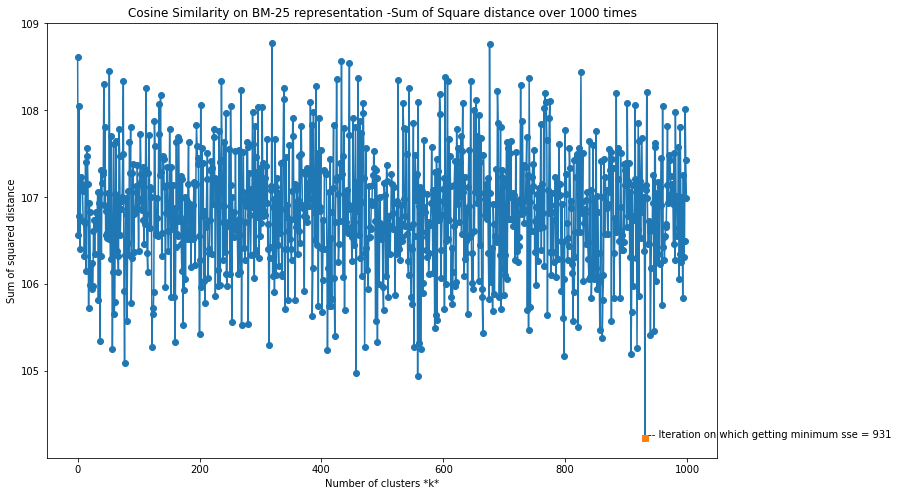

In [36]:
summary_func_n_iter(cosine_bm25,"Cosine Similarity","BM-25 representation")

100%|██████████| 1000/1000 [01:23<00:00, 12.01it/s]


'Decision Node: When a sub-node splits into further sub-nodes, then it is called decision node. In this problem, we need to segregate students who play cricket in their leisure time based on highly significant input variable among all three. Decision tree identifies the most significant variable and its value that gives best homogeneous sets of population. The decision tree algorithm tries to solve the problem, by using tree representation. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label. Not fit for continuous variables: While working with continuous numerical variables, decision tree loses information, when it categorizes variables in different categories. It is therefore recommended to balance the data set prior to fitting with the decision tree. E.g. This splitting process is continued until a user defined stopping criteria is reached. This is called overfitting. Thus, if an unseen data observation falls in that region, we

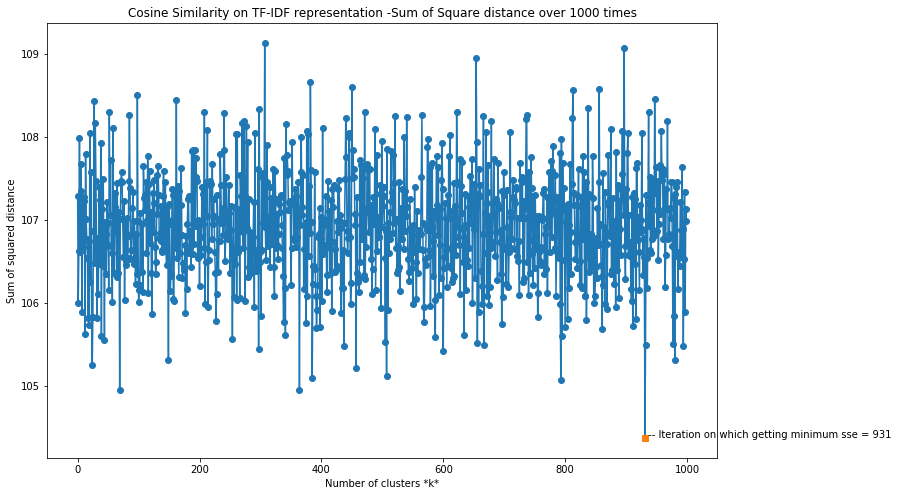

In [37]:
summary_func_n_iter(cosine_tfidf,"Cosine Similarity","TF-IDF representation")

100%|██████████| 1000/1000 [01:32<00:00, 10.79it/s]


'Decision Node: When a sub-node splits into further sub-nodes, then it is called decision node. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label. :- In above scenario of student problem, where the target variable was “Student will play cricket or not” i.e. Its graphical representation is very intuitive and users can easily relate their hypothesis. Records are distributed recursively on the basis of attribute values. Non-Parametric Method: Decision tree is considered to be a non-parametric method. Decision trees implicitly perform variable screening or feature selection. E.g. Both the trees follow a top-down greedy approach known as recursive binary splitting. This bring ‘pruning’. Thus, if an unseen data observation falls in that region, we’ll make its prediction with mean value.'

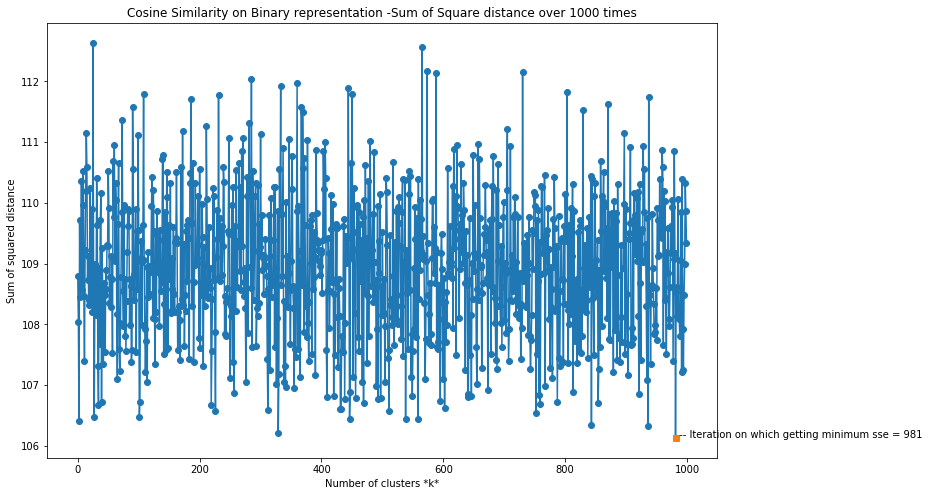

In [38]:
summary_func_n_iter(cosine_binary,"Cosine Similarity","Binary representation" )

100%|██████████| 1000/1000 [01:27<00:00, 11.48it/s]


'Parent and Child Node: A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node. Order to placing attributes as root or internal node of the tree is done by using some statistical approach. In the snapshot below, you can see that variable Gender is able to identify best homogeneous sets compared to the other two variables. Its graphical representation is very intuitive and users can easily relate their hypothesis. With the help of decision trees, we can create new variables / features that has better power to predict target variable. Advantages of Decision Tree:\nEasy to Understand: Decision tree output is very easy to understand even for people from non-analytical background. Records are distributed recursively on the basis of attribute values. E.g. Both the trees follow a top-down greedy approach known as recursive binary splitting. This bring ‘pruning’. Thus, if an unseen data observation falls in that region, we’ll m

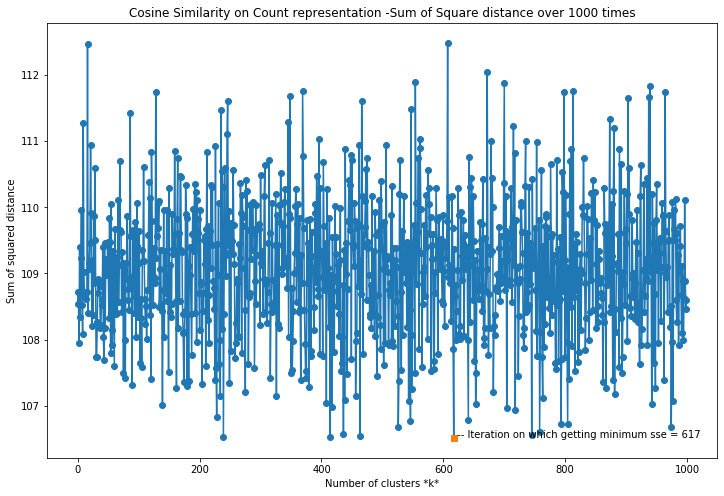

In [39]:
summary_func_n_iter(cosine_count,"Cosine Similarity","Count representation" )

100%|██████████| 1000/1000 [01:23<00:00, 11.95it/s]


'Advantages of Decision Tree:\nEasy to Understand: Decision tree output is very easy to understand even for people from non-analytical background. 15 out of these 30 play cricket in leisure time. They also are well suited to categorization problems where attributes or features are systematically checked to determine a final category. To identify the variable and the split, decision tree uses various algorithms. Branch / Sub-Tree: A sub section of entire tree is called branch or sub-tree. It can be of two types:\nCategorical Variable Decision Tree: Decision Tree which has categorical target variable then it called as categorical variable decision tree. Decision Tree algorithms are referred to as CART (Classification and Regression Trees). Assumptions while creating Decision Tree\nSome of the assumptions we make while using Decision tree:\nAt the beginning, the whole training set is considered as the root. YES or NO. It is not influenced by outliers and missing values to a fair degree. T

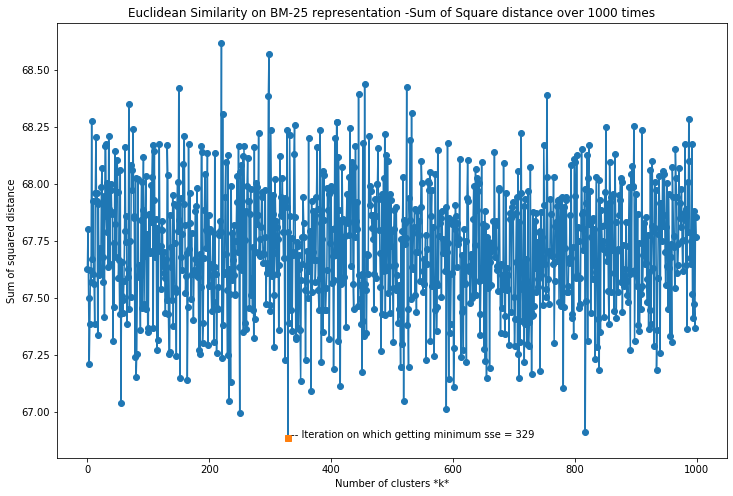

In [40]:
summary_func_n_iter(euclidean_bm25,"Euclidean Similarity","BM-25 representation" )

100%|██████████| 1000/1000 [01:10<00:00, 14.10it/s]


'“The possible solutions to a given problem emerge as the leaves of a tree, each node representing a point of deliberation and decision.”\n- Niklaus Wirth (1934 — ), Programming language designer\nMethods like decision trees, random forest, gradient boosting are being popularly used in all kinds of data science problems. Parent and Child Node: A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node. A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. Example applications include:\n· Evaluation of brand expansion opportunities for a business using historical sales data\n· Determination of likely buyers of a product using demographic data to enable targeting of limited advertisement budget\n· Prediction of likelihood of default for applicant borrowers using predictive models generated from

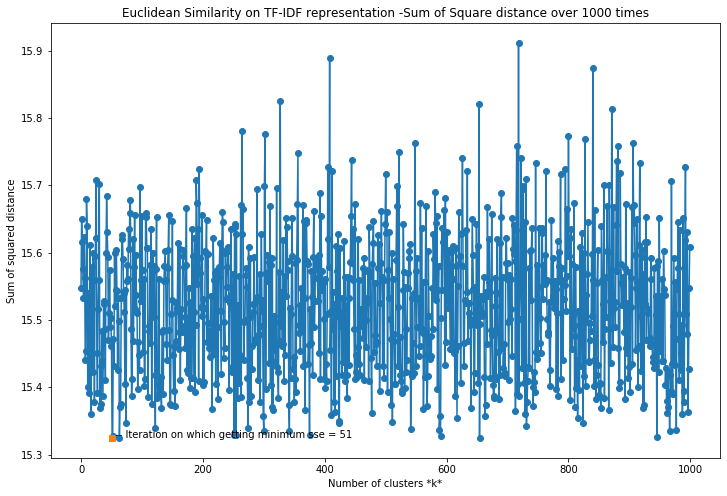

In [41]:
summary_func_n_iter(euclidean_tfidf,"Euclidean Similarity","TF-IDF representation" )

100%|██████████| 1000/1000 [01:29<00:00, 11.17it/s]


'“The possible solutions to a given problem emerge as the leaves of a tree, each node representing a point of deliberation and decision.”\n- Niklaus Wirth (1934 — ), Programming language designer\nMethods like decision trees, random forest, gradient boosting are being popularly used in all kinds of data science problems. Example applications include:\n· Evaluation of brand expansion opportunities for a business using historical sales data\n· Determination of likely buyers of a product using demographic data to enable targeting of limited advertisement budget\n· Prediction of likelihood of default for applicant borrowers using predictive models generated from historical data\n· Help with prioritization of emergency room patient treatment using a predictive model based on factors such as age, blood pressure, gender, location and severity of pain, and other measurements\n· Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strate

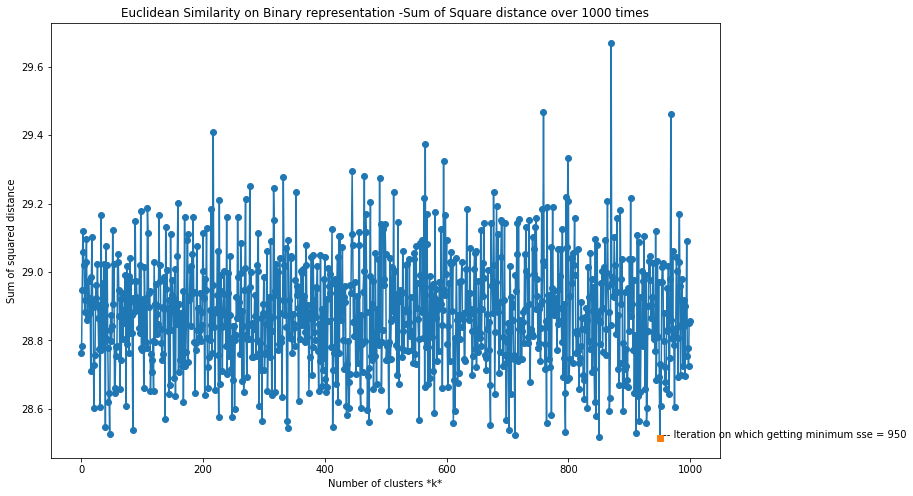

In [42]:
summary_func_n_iter(euclidean_binary,"Euclidean Similarity","Binary representation" )

100%|██████████| 1000/1000 [01:33<00:00, 10.66it/s]


'Parent and Child Node: A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node. Example applications include:\n· Evaluation of brand expansion opportunities for a business using historical sales data\n· Determination of likely buyers of a product using demographic data to enable targeting of limited advertisement budget\n· Prediction of likelihood of default for applicant borrowers using predictive models generated from historical data\n· Help with prioritization of emergency room patient treatment using a predictive model based on factors such as age, blood pressure, gender, location and severity of pain, and other measurements\n· Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal. It can be of two types:\nCategorical Variable Decision Tree: Decision Tree which has categorical target variable then it called as categorical v

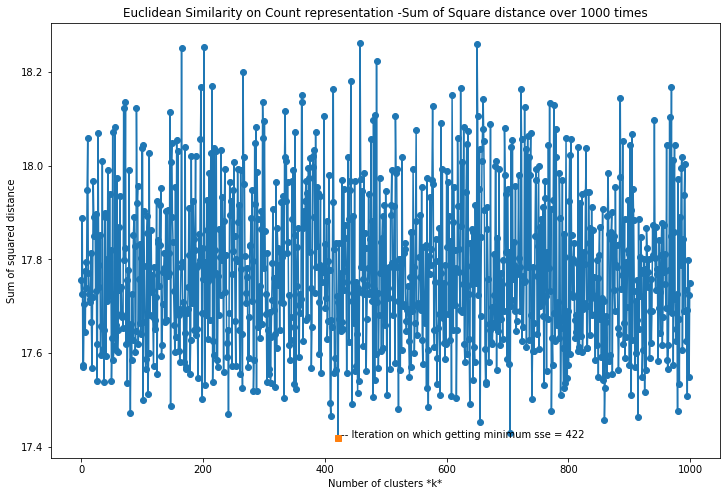

In [43]:
summary_func_n_iter(euclidean_count,"Euclidean Similarity","Count representation" )

100%|██████████| 1000/1000 [01:31<00:00, 10.89it/s]


'Decision Node: When a sub-node splits into further sub-nodes, then it is called decision node. In this problem, we need to segregate students who play cricket in their leisure time based on highly significant input variable among all three. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label. Records are distributed recursively on the basis of attribute values. Types of Decision Trees\nTypes of decision tree is based on the type of target variable we have. Both the trees follow a top-down greedy approach known as recursive binary splitting. Non-Parametric Method: Decision tree is considered to be a non-parametric method. E.g. This problem gets solved by setting constraints on model parameters and pruning. It can also be used in data exploration stage. Thus, if an unseen data observation falls in that region, we’ll make its prediction with mean value.'

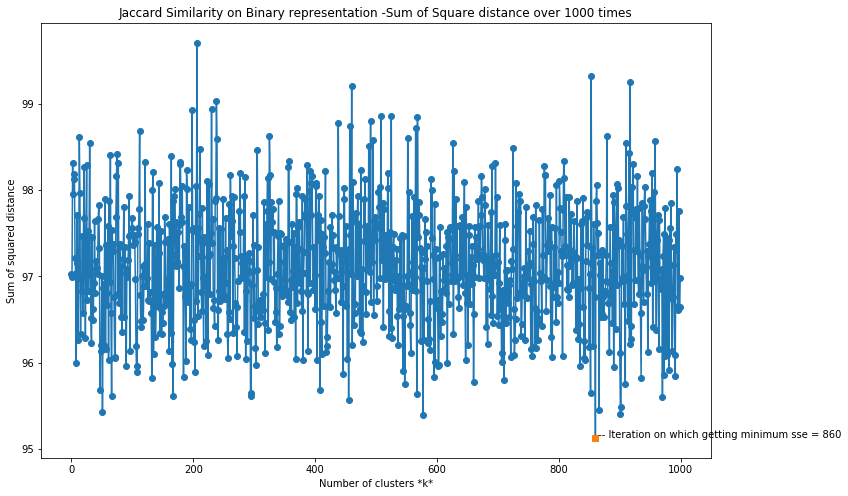

In [44]:
summary_func_n_iter(jaccard_binary,"Jaccard Similarity","Binary representation" )

In [ ]:
# f,ax = plt.subplots(figsize=(15, 15))
# fig=sns.heatmap(sentences_cluster_check, cmap="YlGnBu")

# figure = fig.get_figure()    
# figure.savefig('sse.png', dpi=50)

## normal summaries

## euclidean BM25 summary

In [ ]:
euclidean_BM25_summary=summary_func(euclidean_bm25)
print(euclidean_BM25_summary)

## cosine BM25 summary

In [ ]:
cosine_BM25_summary=summary_func(cosine_bm25)
print(cosine_BM25_summary)

## euclidean tfidf summary

In [ ]:
euclidean_tfidf_summary=summary_func(euclidean_tfidf)
print(euclidean_tfidf_summary)

## cosine tfidf summary

In [ ]:
cosine_tfidf_summary=summary_func(cosine_tfidf)
print(cosine_tfidf_summary)

## euclidean count summary

In [ ]:
euclidean_count_summary=summary_func(euclidean_count)
print(euclidean_count_summary)

## cosine count summary

In [ ]:
cosine_count_summary=summary_func(cosine_count)
print(cosine_count_summary)

## euclidean binary summary

In [ ]:
euclidean_binary_summary=summary_func(euclidean_binary)
print(euclidean_binary_summary)

## cosine binary summary

In [ ]:
cosine_binary_summary=summary_func(cosine_binary)
print(cosine_binary_summary)


## jaccard binary summary

In [ ]:
jaccard_binary_summary=summary_func(jaccard_binary)
print(jaccard_binary_summary)


In [ ]:
p=open(file_name[0]+"_summary."+file_name[1],"a")

In [ ]:
p.write("euclidean BM25 summary\n\n"+euclidean_BM25_summary+"\n\n\n\n\n\n\n\n cosine BM25 summary \n\n"+cosine_BM25_summary+"\n\n\n\n\n\n\n\n euclidean tfidf summary \n\n"+euclidean_tfidf_summary+"\n\n\n\n\n\n\n\n cosine tfidf summary \n\n"+cosine_tfidf_summary+"\n\n\n\n\n\n\n\n euclidean count summary \n\n"+euclidean_count_summary +"\n\n\n\n\n\n\n\n cosine count summary \n\n"+cosine_count_summary+"\n\n\n\n\n\n\n\n euclidean binary summary \n\n"+euclidean_binary_summary +"\n\n\n\n\n\n\n\n cosine binary summary \n\n"+cosine_binary_summary+"\n\n\n\n\n\n\n\n jaccard binary summary \n\n"+jaccard_binary_summary+"\n\n\n\n\n\n\n\n"+data[0])
p.close()